In [29]:
import requests # from urllib.request import urlopen
from bs4 import BeautifulSoup

import pandas as pd
from datetime import datetime
import time
import re

In [34]:
query = '일본차 할인'
url = 'https://search.naver.com/search.naver?where=news&sm=tab_jum&query='+query
urls_list = []


In [35]:
for i in range(5):
    
    url=url+"&start="+str(i*10+1)

    web = requests.get(url).content
    source = BeautifulSoup(web, 'html.parser')


    for urls in source.find_all('a', {'class' : "_sp_each_url"}):
        if urls["href"].startswith("https://news.naver.com"): # starts with ~~~
            urls_list.append(urls["href"])

len(urls_list)

35

In [37]:
# test_list= []
# for a in urls_list[0:3] :
#     test_list.append(a)
# test_list

In [8]:
naver_news = requests.get(urls_list[0]).content
source_news = BeautifulSoup(naver_news,'html.parser')

In [9]:
article = source_news.find('div',{'id':'articleBodyContents'}).get_text()


In [10]:
article = article.replace("\n", "")
article = article.replace("// flash 오류를 우회하기 위한 함수 추가function _flash_removeCallback() {}", "")
article = article.replace("동영상 뉴스       ", "")
article = article.strip()
article

'[머니투데이 장시복 기자] [11월 판매 일시적 회복, 日본사 지원 대규모 할인 덕분…한일 갈등 영향, 내년까지 이어질 듯]지난 9월 9일 서울의 한 닛산자동차 매장의 모습/사진=뉴스1"일본차 브랜드들이 연말 \'폭탄 할인\'을 퍼붓고 있지만, 내년에도 불매운동 여파로 하락세에 브레이크가 걸리긴 쉽지 않습니다."일본차들이 연말을 맞아 할인 폭탄을 대거 투하하고 있다. 일시적으로 판매가 회복됐지만, 불매 운동으로 인한 내림세는 내년까지 이어질 것이란 전망이 높다.17일 산업통상자원부와 수입차 업계에 따르면 지난달 일본차 브랜드는 한국 시장에서 2357대 판매돼 지난해 같은 달보다 56.4%나 줄었다.일본 정부의 수입 규제가 발표됐던 7월(-17.2%)을 시작으로 불매 운동이 확산하면서 8월(-56.9%), 9월(-59.8%), 10월(58.4%)에 이어 부진이 계속된 것이다.그러나 지난 7월(2674대) 이후 4개월 만에 처음 2000대를 웃돌면서 일본차가 회복 국면에 접어든 게 아니냐는 해석도 나왔다. 일본차 판매량은 8월 1398대, 9월 1103대, 10월 1977대로 매달 각각 2000대를 밑돌아 왔기 때문이다.이같은 깜짝 반등은 일본차 업체들의 대규모 할인 이벤트 영향이라는 분석이다. 실제 혼다코리아는 주력 중형세단인 어코드 1.5 터보 모델(3690만원) 재고 물량 800대를 대상으로 연말까지 600만원을 할인해주는 행사를 벌이고 있다. 150만원 상당의 서비스 무상 쿠폰까지 더 준다.한국닛산은 대형 SUV 패스파인더(5340만원)를 자사 금융서비스로 구매하면 주유권 1700만원을, 현금으로 사면 주유권 1400만원을 제공한다. 닛산의 고급브랜드 인피니티도 최대 1000만원 할인에 나섰다. 타 브랜드에 비하 인하에 소극적이었던 토요타도 주력 SUV 라브4를 500만원 깎아주고 있다.그러나 내년에도 일본과의 관계 회복이 이뤄지지 않을 경우 반등을 기대하긴 어렵다는 시각이 우세하다.최근 새 일본차에 세 자리가 아닌 두 자릿수 번호판을 달아 불매운동 이전

In [39]:


from selenium import webdriver

from bs4 import BeautifulSoup

import time


driver = webdriver.Chrome('./chromedriver') 
comments=[]
for url in urls_list:
    try:
        print(url+'하는중')
        driver.get(url+'&m_view=1&includeAllCount=true')
        time.sleep(3)

        for i in range(0, 2) : #댓글더보기 범위

              driver.find_element_by_css_selector(".u_cbox_btn_more").click() #댓글더보기

              time.sleep(3)

              i +=1


        
        html = driver.page_source

        bs = BeautifulSoup(html, 'html.parser')

        contents = bs.find_all("span", {"class" : "u_cbox_contents"})

        for content in contents :
            comments.append(content.text)
            print(len(comments))
    except:
        print("><")

print(comments)



https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=103&oid=421&aid=0004363469하는중
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=008&aid=0004326467하는중
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=100&oid=214&aid=0001001065하는중
><
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=018&aid=0004538321하는중
><
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=469&aid=0000449294하는중
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
https://n

In [40]:
len(comments)

810

In [41]:
string=" ".join(comments)
string

'소비자들의 개인적인 선택까지 뭐라고 하고싶지는 않은데 꼭 저시기에 저선택을 해야했을까 하는 궁금함은 있다. 그렇구나. 꼼수까지 쓰는구나. 이제 일본차는 귀찮아도 무조건 100프로 신고해야겠다 ㅇㅇ 미개인들이나 선동 당해서 부들부들 거리지 좌빨 간부 박원순은 렉서스 잘만 타고 다니고 부수령 딸래미는 일본대학 나옴 ㅅㄱ 돈은 없고 외제차는 타보고 싶고..막세일 해주니까 질러놓고 후회되지 않겠나??일본차들 앞에서 깔짝대면 양보도 해주기 싫드라 자기돈주고 일본차 사고 덤으로 제조사 임원들과 일본 극우들에게 비웃음과 조롱까지 부록으로 가져가는 클라스 역시나 하는짖이 쪽바리다~~~ 불매운동 계속합시다!!!! 쭉~~~~~~~~~~~~~~~ 성능좋은차 좋아하는건 소비자의 선택입니다.현대차 조립공정때 동영상보며 건성건성하는거 보셨지요?일부이겠지만 이런식 근무작태는  노동정신 타락한겁니다 국가적 자존심 중요한 사람들이 중국 외무부 장관 와서 명나라때 사신 행세하고 가도 아무도 뭐라 안하면서 일본한테는 왜 그 지랄인지 좀 궁금은 하다 근무시간에 유튜브 보며 놀면서 가끔 자동차 조립하는 현기 민주노총 먹여살릴바에  일본차 사는게 낫다. 쪽바리니 뭐니 해도 일본놈들은 물건은 제대로 만드니까 불매 좋지..국산차 사면 되는거고근데 소나타 쥐소리나지..셀토스 쥐소리나지..k5 소나타랑 같은 플랫폼이니 쥐소리 날 예정이지신차 샀더니 구리스만 발라주는데...이러니 타 브랜드로 눈 돌아가는거 아니겠냐 현기야..개인에게 불매 외치기 전에..뭘 팔고 문제가 있으면 후속조치라도 하렴3천만원짜리 쥐새끼 키우랴....신차인데 심각하다.. 국산차들이 얼마나 쓰레기면 저러겠냐? 벤츠 같은건 비싸고 저런 매국노들다 잡아들여라 아직도우리안에는 매국노의피가 이어져 가고있구나? 근데 교활이는 어떻게 점점 더 찌질이가 되어가냐?  길바닥에서 너무논다.. 땅그지.. 일본차 사지마라사고싶냐?? 나라도 팔아먹을 매국노같은 인간들,,니들이 대한민국민이냐? 부끄러움도 모르지 당당하게 사놓고 왜 내 차라 말을 못해 등신인가

In [42]:
save=open("comments_naver_크롤링.txt", 'w' , encoding='utf-8' )
save.write(string)
save.close()

In [44]:
with open('comments_naver_크롤링.txt', 'r', encoding= 'utf-8') as f: 
    doc = ''  # 리뷰 데이터를 담기 위한 String 변수 생성
    lines = f.readlines()  # 영화 리뷰 파일의 모든 라인을 읽어와 리스트로 저장
    for line in lines:  # for문을 통해 lines에 있는 모든 텍스트를 doc2에 이어 붙임
        doc += line

In [45]:
doc

'소비자들의 개인적인 선택까지 뭐라고 하고싶지는 않은데 꼭 저시기에 저선택을 해야했을까 하는 궁금함은 있다. 그렇구나. 꼼수까지 쓰는구나. 이제 일본차는 귀찮아도 무조건 100프로 신고해야겠다 ㅇㅇ 미개인들이나 선동 당해서 부들부들 거리지 좌빨 간부 박원순은 렉서스 잘만 타고 다니고 부수령 딸래미는 일본대학 나옴 ㅅㄱ 돈은 없고 외제차는 타보고 싶고..막세일 해주니까 질러놓고 후회되지 않겠나??일본차들 앞에서 깔짝대면 양보도 해주기 싫드라 자기돈주고 일본차 사고 덤으로 제조사 임원들과 일본 극우들에게 비웃음과 조롱까지 부록으로 가져가는 클라스 역시나 하는짖이 쪽바리다~~~ 불매운동 계속합시다!!!! 쭉~~~~~~~~~~~~~~~ 성능좋은차 좋아하는건 소비자의 선택입니다.현대차 조립공정때 동영상보며 건성건성하는거 보셨지요?일부이겠지만 이런식 근무작태는  노동정신 타락한겁니다 국가적 자존심 중요한 사람들이 중국 외무부 장관 와서 명나라때 사신 행세하고 가도 아무도 뭐라 안하면서 일본한테는 왜 그 지랄인지 좀 궁금은 하다 근무시간에 유튜브 보며 놀면서 가끔 자동차 조립하는 현기 민주노총 먹여살릴바에  일본차 사는게 낫다. 쪽바리니 뭐니 해도 일본놈들은 물건은 제대로 만드니까 불매 좋지..국산차 사면 되는거고근데 소나타 쥐소리나지..셀토스 쥐소리나지..k5 소나타랑 같은 플랫폼이니 쥐소리 날 예정이지신차 샀더니 구리스만 발라주는데...이러니 타 브랜드로 눈 돌아가는거 아니겠냐 현기야..개인에게 불매 외치기 전에..뭘 팔고 문제가 있으면 후속조치라도 하렴3천만원짜리 쥐새끼 키우랴....신차인데 심각하다.. 국산차들이 얼마나 쓰레기면 저러겠냐? 벤츠 같은건 비싸고 저런 매국노들다 잡아들여라 아직도우리안에는 매국노의피가 이어져 가고있구나? 근데 교활이는 어떻게 점점 더 찌질이가 되어가냐?  길바닥에서 너무논다.. 땅그지.. 일본차 사지마라사고싶냐?? 나라도 팔아먹을 매국노같은 인간들,,니들이 대한민국민이냐? 부끄러움도 모르지 당당하게 사놓고 왜 내 차라 말을 못해 등신인가

In [46]:
from konlpy.tag import Twitter

twitter = Twitter()
raw_pos_tagged = twitter.pos(contents_str, norm=True, stem=True)
raw_pos_tagged

C:\ProgramData\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


[('"', 'Punctuation'),
 ('일', 'Modifier'),
 ('본가', 'Noun'),
 ('서', 'Josa'),
 ('살다', 'Verb'),
 ('더럽다', 'Adjective'),
 ('것', 'Noun'),
 ('들', 'Suffix'),
 ('아', 'Josa'),
 ('그러면', 'Adverb'),
 ('그렇게', 'Adverb'),
 ('까지', 'Josa'),
 ('하다', 'Verb'),
 ('살다', 'Verb'),
 ('차', 'Noun'),
 ('맘껏', 'Noun'),
 ('사면', 'Noun'),
 ('되다', 'Verb'),
 ('않다', 'Verb'),
 ('?""', 'Punctuation'),
 ('현대차', 'Noun'),
 ('일본', 'Noun'),
 ('입성', 'Noun'),
 ('한지', 'Noun'),
 ('삼', 'Modifier'),
 ('년', 'Noun'),
 ('만에', 'Josa'),
 ('열', 'Modifier'),
 ('대여섯', 'Noun'),
 ('대', 'Suffix'),
 ('팔고', 'Noun'),
 ('철수', 'Noun'),
 ('하다', 'Verb'),
 ('.', 'Punctuation'),
 ('삼성', 'Noun'),
 ('스마트폰', 'Noun'),
 ('일본', 'Noun'),
 ('에서', 'Josa'),
 ('흔적', 'Noun'),
 ('이', 'Josa'),
 ('안보', 'Noun'),
 ('여서', 'Josa'),
 ('찾아보다', 'Verb'),
 ('로고', 'Noun'),
 ('뺴', 'Noun'),
 ('고', 'Josa'),
 ('구석', 'Noun'),
 ('에', 'Josa'),
 ('치다', 'Verb'),
 ('박히다', 'Verb'),
 ('있다', 'Adjective'),
 ('...', 'Punctuation'),
 ('농심라면', 'Noun'),
 ('일본', 'Noun'),
 ('에서', 'Josa'),
 ('구석', '

In [47]:
# 유의미한 의미를 갖고 있지 않은 단어를 제외할 수 있습니다.
del_list = ['하다', '있다', '되다', '이다', '돼다', '않다', '그렇다', '아니다', '이렇다', '그렇다', '어떻다','\n','ㅋ','지금'
           ,'우리','여기','ㅋㅋㅋ','아직','같다','없다','오다','차다','보다','자다','아직도','들어오다','들이다','나다','살다'
           ,'넘다','들다','주다','다니다','답글','알다','세기','라이','현기','따라가다','해보다','잖다','많다','저렇게','그냥',
           '싶다','프로필','13','대표','계정','건가','아지','힘주다','어쩌구','ㅠㅠ','ㅉㅉ','ㅎㅎ','없다','위해','완전','절대','그게','아무'] 

word_cleaned = []
for word in raw_pos_tagged:
    if not word[1] in ["Josa", "Eomi", "Punctuation", "Foreign"]: # Foreign == ”, “ 와 같이 제외되어야할 항목들
        if (len(word[0]) != 1) & (word[0] not in del_list): # 한 글자로 이뤄진 단어들을 제외 & 원치 않는 단어들을 제외
            word_cleaned.append(word[0])
        


In [48]:
word_dic = {}

for word in word_cleaned:
    if word not in word_dic:
        word_dic[word] = 1 # changed from "0" to "1"
    else:
        word_dic[word] += 1

In [49]:
word_frequency = nltk.FreqDist(word_cleaned)
word_frequency

FreqDist({'일본차': 206, '일본': 109, '사다': 102, '사람': 80, '타다': 79, '좋다': 70, '번호판': 55, '한국': 53, '불매운동': 50, '불매': 48, ...})

In [50]:
df = pd.DataFrame(list(word_frequency.values()), word_frequency.keys()) 

In [51]:
result = df.sort_values([0], ascending=False)

In [52]:
len(result)

2317

In [53]:
result = result[:100]

In [54]:
# WordCloud 패키지를 import 합니다.
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image # 만약 "No module named 'PIL'" 에러가 발생하면 [ pip install Pillow==5.4.1 ] 로 라이브러리를 설치해줍니다.

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
word_cloud = WordCloud(font_path="C:/Windows/Fonts/malgun.ttf", # font_path="C:/Windows/Fonts/NanumSquareB.ttf"
                       max_words=100,
                       width=2000, height=1000, # 이 부분을 수정하시면 실제 워드클라우드의 크기가 바뀝니다 (해상도가 바뀝니다)
                       # prefer_horizontal= 1.0, # 이 부분의 주석을 해제하시면 단어들이 가로로만 그려지게 됩니다. (0~1)
                       background_color='white')

In [56]:
word_cloud.generate_from_frequencies(word_dic) # Generate wordcloud from word "frequency" data.

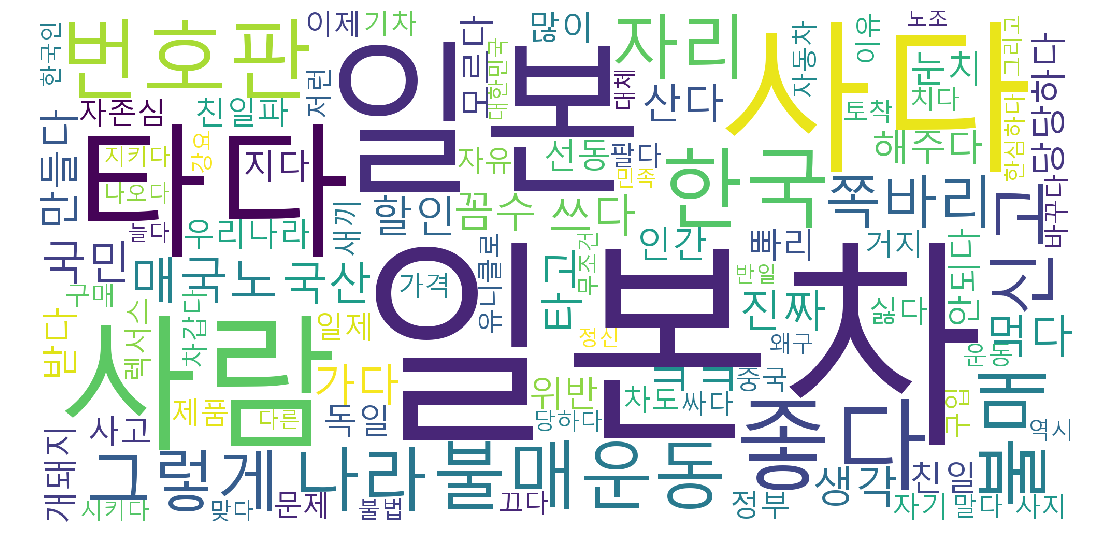

In [57]:
# 생성한 WordCloud 객체로부터 워드클라우드를 보여주는 코드입니다.

plt.figure(figsize=(15,15)) # 이 부분을 수정하시면 화면에서 보여지는 워드클라우드의 크기가 바뀝니다 
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [58]:
word_cloud.to_file("word_cloud_naver_크롤링.png")